In [27]:
!sudo apt-get update && apt-get upgrade python-pip

Get:1 https://packages.cloud.google.com/apt cloud-sdk InRelease [6751 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [361 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:4 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5389 B]    
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:6 http://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [1655 B]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:8 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1712 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [27.5 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2316 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [1866 kB]
Get:1

In [28]:
!pip3 install lazypredict
!pip install -U skater==1.0.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 416.2 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 631.6 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for skater: filename=skater-1.0.4-py3-none-any.whl size=53756 sha256=c81a5629e72d500e9cdb2515b519234baffc3d2a3b60486c8c4c286eb0c5bd7e
  Stored in directory: /root/.cache/pip/wheels/59/df/d5/4caaa134859355efdb3899597015a5ecf238ef52683d6b4d96
  Created wheel for ds-lime: filename=ds_lime-0.1.1.27-py3-none-any.whl size=261606 sha256=0ef7ce540782439fe318e3fefc2cd290747d89ea787642c27581ae8edcbcc6aa
  Stored in directory: /root/.cache/pip/wheels/4a/b8/e7/a458f3742328a23a7fc4674207955c47094bc233a9a0139963
Successfully built skater ds-lime


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from matplotlib import pyplot
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from lazypredict.Supervised import LazyClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

In [30]:
df=pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

In [31]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice
5,69,37,42,23.06,83.37,7.07,251.05,rice
6,69,55,38,22.71,82.64,5.70,271.32,rice
7,94,53,40,20.28,82.89,5.72,241.97,rice
8,89,54,38,24.52,83.54,6.69,230.45,rice
9,68,58,38,23.22,83.03,6.34,221.21,rice


In [32]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.31,55.20,6.35,141.48,coffee
2191,118,31,34,27.55,62.88,6.12,181.42,coffee
2192,106,21,35,25.63,57.04,7.43,188.55,coffee
2193,116,38,34,23.29,50.05,6.02,183.47,coffee
2194,97,35,26,24.91,53.74,6.33,166.25,coffee
2195,107,34,32,26.77,66.41,6.78,177.77,coffee
2196,99,15,27,27.42,56.64,6.09,127.92,coffee
2197,118,33,30,24.13,67.23,6.36,173.32,coffee
2198,117,32,34,26.27,52.13,6.76,127.18,coffee
2199,104,18,30,23.60,60.40,6.78,140.94,coffee


In [33]:
#Extracting Data Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [34]:
#Feature Identification
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [35]:
#Data Numeric:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [36]:
#Data Categorical:
df_cat=df.select_dtypes(include='object')
df_cat.head(5)

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [37]:
#Missing Values:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


No null values

In [39]:
#checking duplicate rows:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :"+str(len(duplicate)))

Duplicate Rows :0


In [40]:
#Statistical approach:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)


,count,mean,std,min,25%,50%,75%,max
N,2200.00,50.55,36.92,0.00,21.00,37.00,84.25,140.00
P,2200.00,53.36,32.99,5.00,28.00,51.00,68.00,145.00
K,2200.00,48.15,50.65,5.00,20.00,32.00,49.00,205.00
temperature,2200.00,25.62,5.06,8.83,22.77,25.60,28.56,43.68
humidity,2200.00,71.48,22.26,14.26,60.26,80.47,89.95,99.98
ph,2200.00,6.47,0.77,3.50,5.97,6.43,6.92,9.94
rainfall,2200.00,103.46,54.96,20.21,64.55,94.87,124.27,298.56


In [41]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
label,2200,22,rice,100


In [42]:
#Graphic approach:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


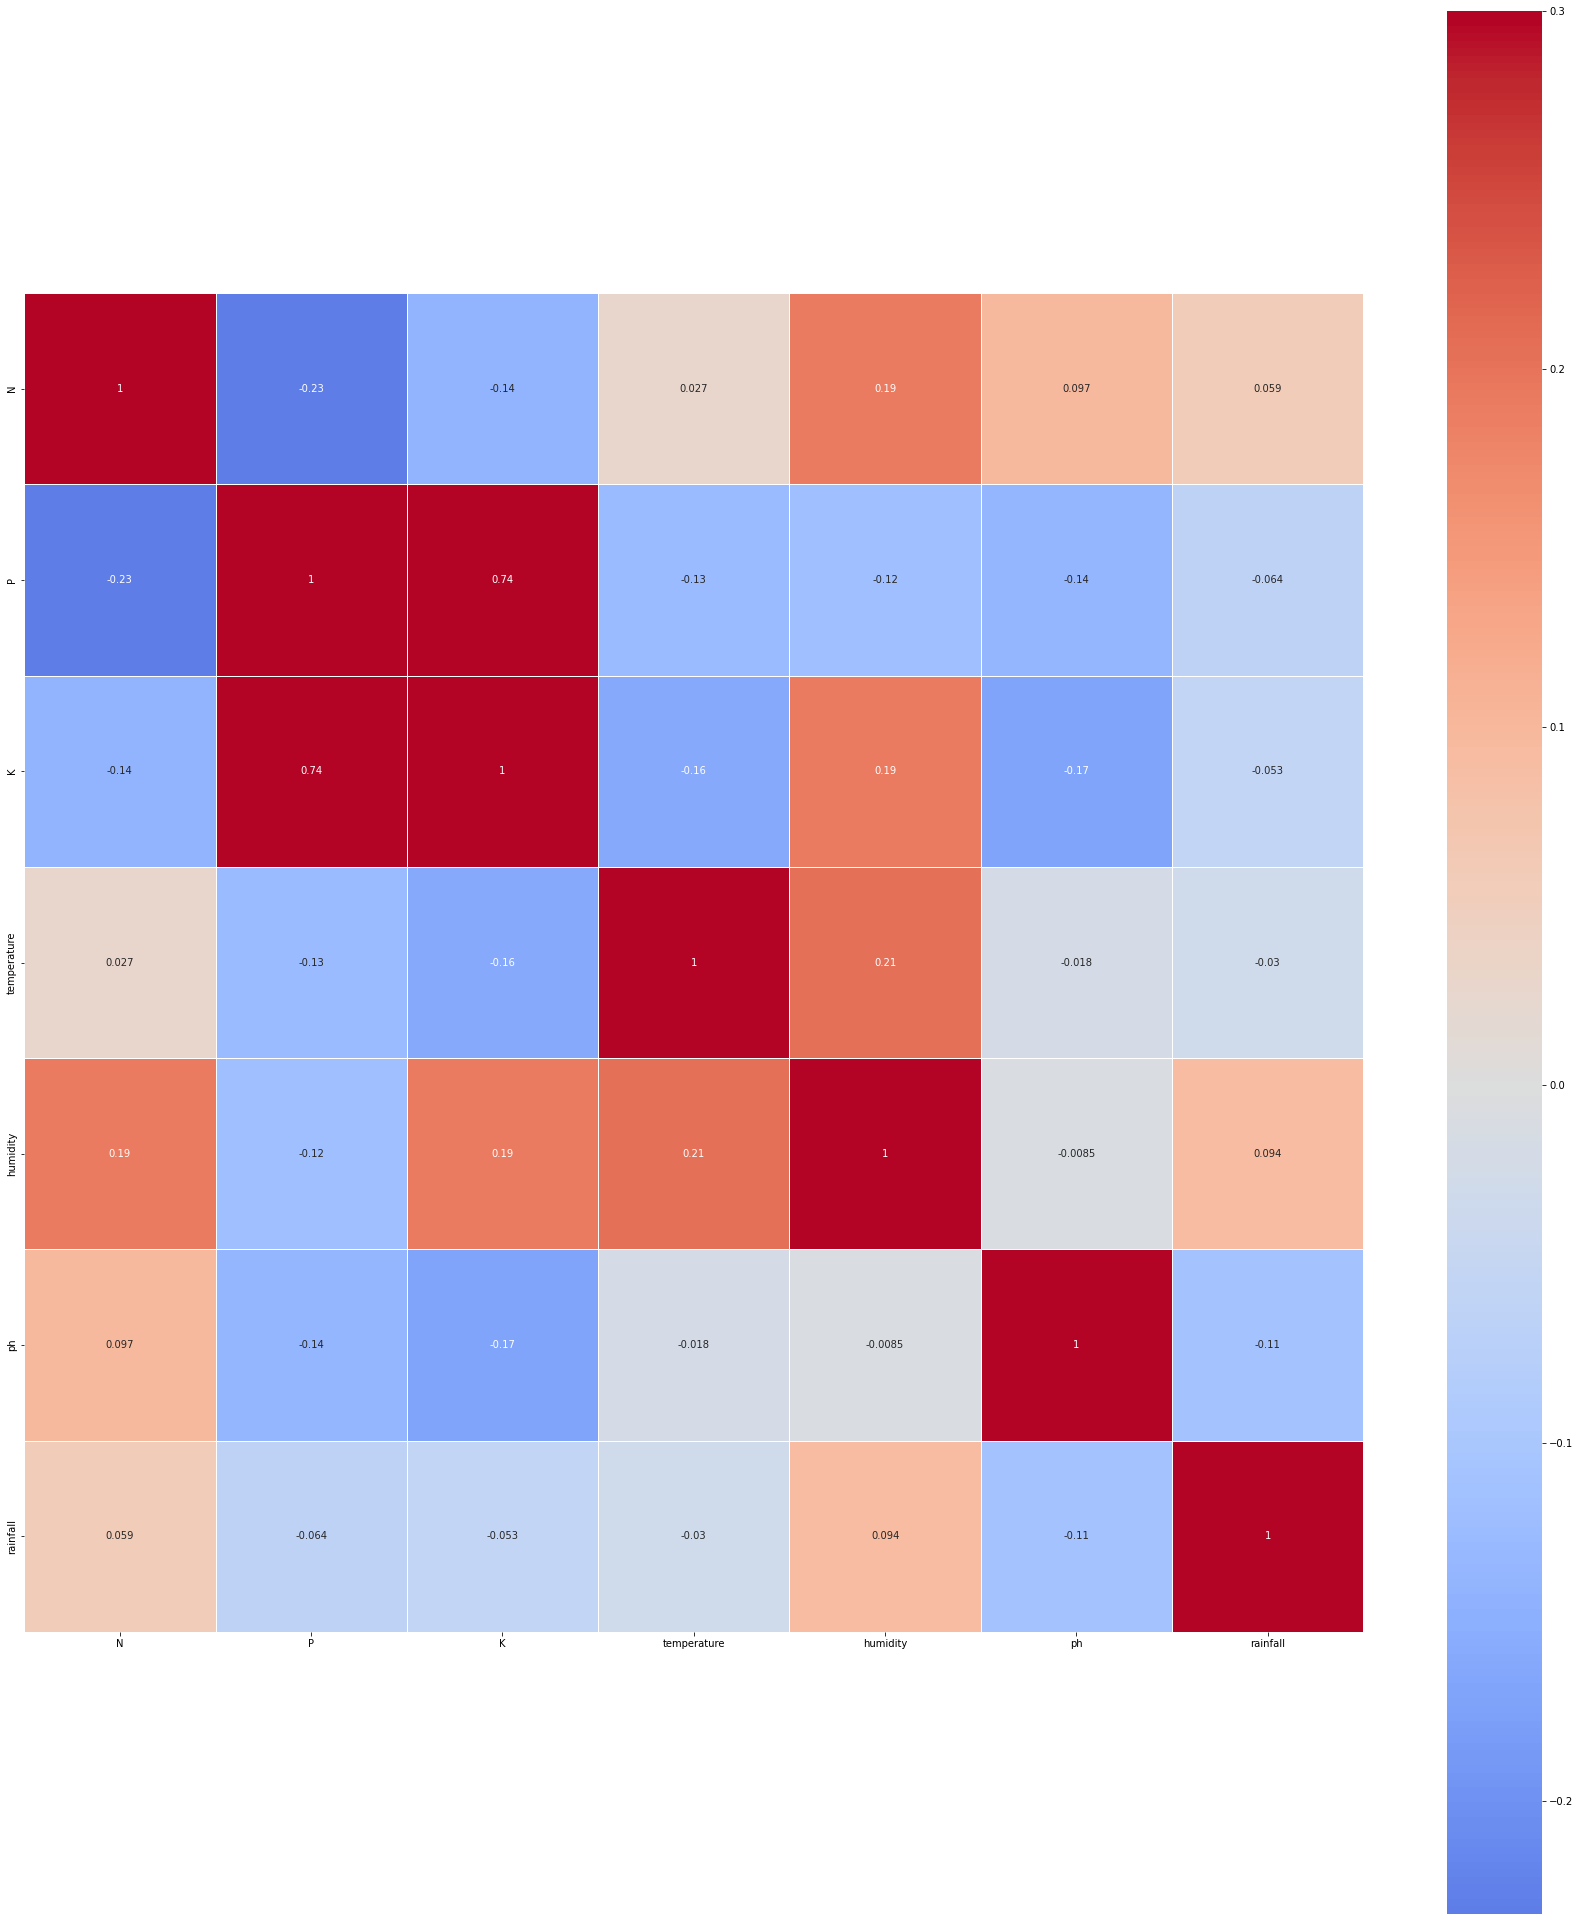

In [43]:
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),  cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [44]:
corr=df.corr()
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
G.edges(data=True)

EdgeDataView([('N', 'N', {'weight': 1.0}), ('N', 'P', {'weight': -0.23145957738457262}), ('N', 'K', {'weight': -0.14051183844915763}), ('N', 'temperature', {'weight': 0.026503796219081235}), ('N', 'humidity', {'weight': 0.19068837919787315}), ('N', 'ph', {'weight': 0.09668284622242848}), ('N', 'rainfall', {'weight': 0.05902022369254324}), ('P', 'P', {'weight': 1.0}), ('P', 'K', {'weight': 0.736232217244661}), ('P', 'temperature', {'weight': -0.12754112864533876}), ('P', 'humidity', {'weight': -0.11873411647954892}), ('P', 'ph', {'weight': -0.13801889348863647}), ('P', 'rainfall', {'weight': -0.063839051330259}), ('K', 'K', {'weight': 1.0}), ('K', 'temperature', {'weight': -0.16038713278089597}), ('K', 'humidity', {'weight': 0.1908588608364631}), ('K', 'ph', {'weight': -0.16950309817325426}), ('K', 'rainfall', {'weight': -0.05346135449256889}), ('temperature', 'temperature', {'weight': 1.0}), ('temperature', 'humidity', {'weight': 0.2053196766307067}), ('temperature', 'ph', {'weight': -

In [45]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < min_correlation or s1==s2:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] > min_correlation or s1==s2:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())

    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))
    plt.figure(figsize=(15,15))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=14)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

<Figure size 1080x1080 with 0 Axes>

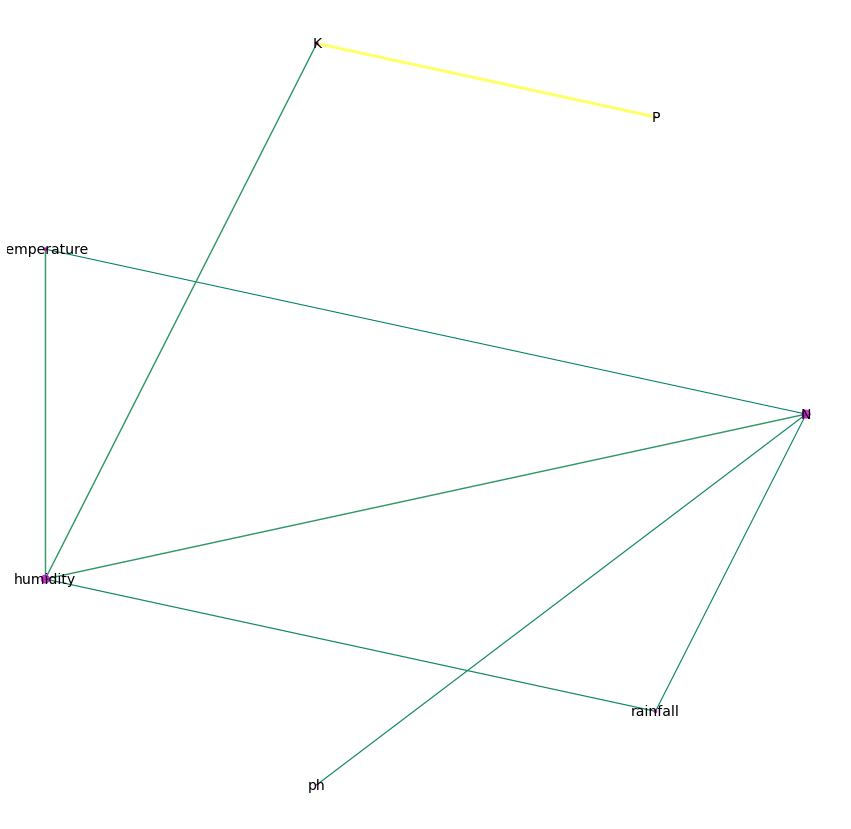

In [46]:
#Correlational Network:
corr_network(G, corr_direction="positive",min_correlation =0)

In [47]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
fig = make_subplots(rows=1, cols=len(df_num.columns))
featuresNum = df_num.columns

plt.figure(figsize=(50, 40))
for i in range(0, len(featuresNum)):
    trace=go.Box(y=df[featuresNum[i]], name=featuresNum[i])
    fig.append_trace(trace, row=1, col=i+1)

fig.show()


<Figure size 3600x2880 with 0 Axes>

In [48]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
featuresNum = ['N', 'P', 'K']

for i in range(-1, len(featuresNum)-3):
    fig = go.Figure()
    fig.update_layout(autosize=False, width=1280, height=720)
    trace1=go.Scatter(y=df[featuresNum[i+1]], name=featuresNum[i+1])
    fig.add_trace(trace1)
    trace2=go.Scatter(y=df[featuresNum[i+2]], name=featuresNum[i+2])
    fig.add_trace(trace2)
    trace3=go.Scatter(y=df[featuresNum[i+3]], name=featuresNum[i+3])
    fig.add_trace(trace3)
    fig.show()

In [49]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
featuresNum = df_num.columns

plt.figure(figsize=(50, 40))
for i in range(0, len(featuresNum)):
    fig = px.histogram(df, x=featuresNum[i])
    fig.show()


<Figure size 3600x2880 with 0 Axes>

**Compositional Analaysis**

In [50]:
featuresNum = df.columns

plt.figure(figsize=(50, 40))
for i in range(0, len(featuresNum)-1):
  fig = px.pie(df, values=featuresNum[i], names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Composition of crops with "+featuresNum[i])
  fig.show()

<Figure size 3600x2880 with 0 Axes>